In [212]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
import joblib

In [200]:
# 0 = suspicious            1 = legitimate

file1_path = "Phishing_Legitimate_full.csv"
df1 = pd.read_csv(file1_path)

# print(df1.shape)
class_counts = df1['CLASS_LABEL'].value_counts()
print(class_counts)
# df1

CLASS_LABEL
1    5000
0    5000
Name: count, dtype: int64


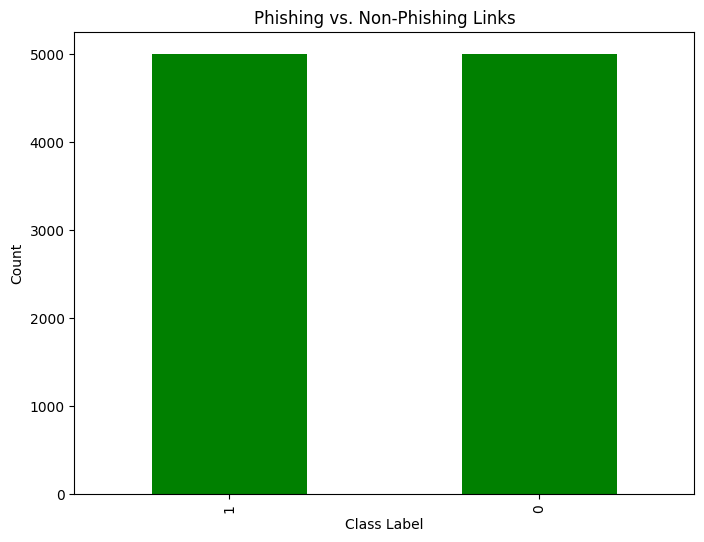

In [199]:
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='green')
plt.title('Phishing vs. Non-Phishing Links')
plt.xlabel('Class Label')
plt.ylabel('Count')

plt.show()

In [216]:
x1 = df1.drop(columns=['CLASS_LABEL', 'id']) # Include all columns except CLASS_LABEL and id
y1 = df1['CLASS_LABEL']

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=42)

In [217]:
rf_model1 = RandomForestClassifier()
rf_model1.fit(x1_train, y1_train)

RandomForestClassifier()

In [218]:
xgb_model1 = xgb.XGBClassifier()
xgb_model1.fit(x1_train, y1_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [219]:
lgb_model1 = lgb.LGBMClassifier()
lgb_model1.fit(x1_train, y1_train)

[LightGBM] [Info] Number of positive: 3988, number of negative: 4012
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000995 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1512
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498500 -> initscore=-0.006000
[LightGBM] [Info] Start training from score -0.006000


LGBMClassifier()

In [220]:
rf_predictions_phishing = rf_model1.predict(x1_test)
xgb_predictions_phishing = xgb_model1.predict(x1_test)
lgb_predictions_phishing = lgb_model1.predict(x1_test)

combined_predictions_phishing = (rf_predictions_phishing + xgb_predictions_phishing + lgb_predictions_phishing) / 3

In [223]:
phishing_accuracy = (combined_predictions_phishing == y1_test).mean()
print(f"Combined Accuracy for Phishing Dataset: {phishing_accuracy * 100:.2f}%")

Combined Accuracy for Phishing Dataset: 97.90%


In [233]:
file2_path = "Malware dataset.csv"
df2 = pd.read_csv(file2_path)

classification = df2['classification'].value_counts()

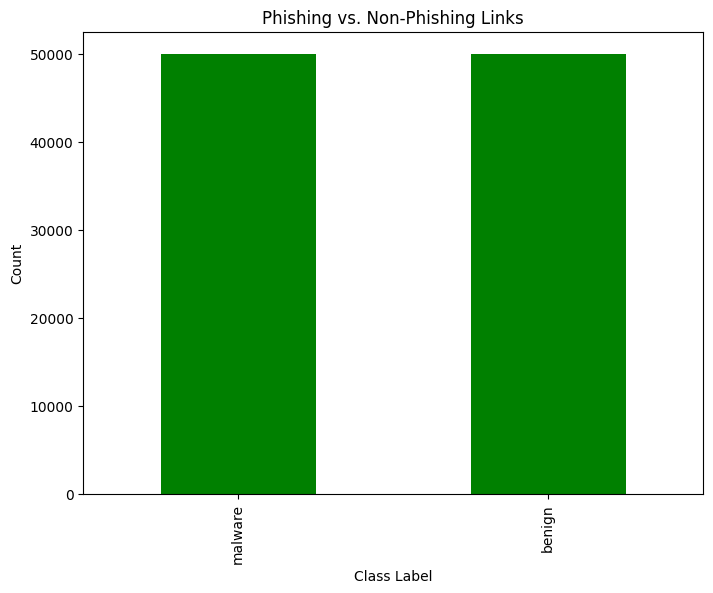

In [234]:
plt.figure(figsize=(8, 6))
classification.plot(kind='bar', color='green')
plt.title('Phishing vs. Non-Phishing Links')
plt.xlabel('Class Label')
plt.ylabel('Count')

plt.show()

In [235]:
x2 = df2.drop(columns=['hash', 'classification']) # Include all columns except hash and classification
y2 = df2['classification']

label_encoder = LabelEncoder()
y2_encoded = label_encoder.fit_transform(y2)

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2_encoded, test_size=0.2, random_state=42)

In [236]:
rf_model2 = RandomForestClassifier()
rf_model2.fit(x2_train, y2_train)

df2['classification'].value_counts()

classification
malware    50000
benign     50000
Name: count, dtype: int64

In [237]:
xgb_model2 = xgb.XGBClassifier()
xgb_model2.fit(x2_train, y2_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [238]:
lgb_model2 = lgb.LGBMClassifier()
lgb_model2.fit(x2_train, y2_train)

[LightGBM] [Info] Number of positive: 40030, number of negative: 39970
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008864 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3080
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500375 -> initscore=0.001500
[LightGBM] [Info] Start training from score 0.001500


LGBMClassifier()

In [239]:
rf_predictions_malware = rf_model2.predict(x2_test)
xgb_predictions_malware = xgb_model2.predict(x2_test)
lgb_predictions_malware = lgb_model2.predict(x2_test)
combined_predictions_malware = (rf_predictions_malware + xgb_predictions_malware + lgb_predictions_malware) / 3

In [241]:
combined_accuracy_malware = (combined_predictions_malware == y2_test).mean()
print(f"Combined Accuracy for Malware Dataset: {combined_accuracy_malware * 100:.2f}%")

Combined Accuracy for Malware Dataset: 100.00%
